### **Submission rules**:
1. The completed assignment should be prepared as s a Jupyter Notebook (.ipynb file). Please make a copy of this notebook for your team. Make sure you opened it via UCU email address. Submit the Jupyter Notebook (.ipynb file) to **cms**.
2. Please execute all the cells before submission; make sure there are no errors, everything has been generated, and all numerical answers calculated.
3. There should be only one submission per team. However, don't forget to choose a person from your team who would submit the task, and make sure that the names of all team members are listed in the notebook. Teammates not mentioned in the notebook will not be graded for this lab.
4. You also need to provide a work breakdown structure estimating the efforts of each team member. Please provide it at the top of your notebook.
5. The final deadline is **April 9 2024, 23:59**.

**IMPORTANT**: If you submit your assignment after this time and date, it will not be graded.


Team:

Ihor Ivanyshyn - all code + particulary description

Andrii Ahitoliev - description

Anastasia Martsinkovska - description

# Image compression with SVD

The singular value decomposition of a matrix A is the factorization of A into the
product of three matrices:
\begin{align}
 A = UDV^T,
 \end{align}
where the columns of U and V are orthonormal and
the matrix D is diagonal with positive real entries. The SVD is useful in many tasks. First, in many applications, the data matrix A is close to a
matrix of low rank and it is useful to find a low rank matrix which is a good approximation
to the data matrix. You will show that from the singular value decomposition of A, we can get the matrix B of rank k which best approximates A; in fact, we can do this for every
k. Also, singular value decomposition is defined for all matrices (rectangular or square) unlike spectral decomposition, although the latter one is used more commonly in Linear Algebra.

Considering that any image can be represented as a rectangular matrix, you can find the best rank k approximation of this image using SVD. The idea is that by significantly reducing the storage space, you can still preserve a very good quality of the image

In [ ]:
from google.colab.patches import cv2_imshow
import cv2 as cv
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widget
import math
from math import log10, sqrt
import matplotlib.pyplot as plt

### SVD of symmetric matrices (0.5 pts)

Here you have a symmetric matrix A. Compute a full SVD of this matrix (you may use built-in SVD functions).

In [ ]:
A = np.array([[1, 2, 3, 4], [2, 7, 4, 5], [3, 4, 3, 8], [4, 5, 8, 3]])
# Your code here
U, d, Vh = np.linalg.svd(A)

print("U:")
print(U)
print("\nSingular Values (d):")
print(d)
print("\nV^T:")
print(Vh)

U:
[[-0.30461046 -0.14903379  0.31295055  0.88716591]
 [-0.54242371 -0.07127124 -0.83165076  0.09515223]
 [-0.53433563 -0.64331012  0.35591771 -0.41708524]
 [-0.57225381  0.74757035  0.28938132 -0.17298151]]

Singular Values (d):
[17.33847234  5.15839249  2.79573697  0.97581683]

V^T:
[[-0.30461046 -0.54242371 -0.53433563 -0.57225381]
 [ 0.14903379  0.07127124  0.64331012 -0.74757035]
 [ 0.31295055 -0.83165076  0.35591771  0.28938132]
 [-0.88716591 -0.09515223  0.41708524  0.17298151]]


Explain what matrices did you get as a result. What can you say about singular values of this matrix (about its eigenvalues)? Derive singular values without using built-in functions.



The matrices obtained as a result are:

U: This is an orthogonal matrix, whose columns are the left-singular vectors of A. The left-singular vectors are the eigenvectors of A^T A.

Singular Values (d): This is a vector containing the singular values of A. The singular values are the square roots of the eigenvalues of A^T A. The singular values are arranged in descending order.

V^T: This is an orthogonal matrix, whose rows are the right-singular vectors of A. The right-singular vectors are the eigenvectors of A A^T.

One important property of the singular values of A is that they determine the amount of information that can be preserved after compression using SVD. The larger the singular values, the more important the corresponding columns of U and rows of V* are in representing the original matrix A, and the less information can be discarded in the compression process.

In [ ]:
# Your code here
print(np.sort(np.sqrt(np.linalg.eig(A.T @ A)[0]))[::-1])

[17.33847234  5.15839249  2.79573697  0.97581683]


How $SVD$ relates to matrises $Q, D, Q^T$ in spectral decomposition of this matrix? Are they identical? If they are, can you say that SVD of symmetric matrices always corresponds to its spectral decomposition? If not, then is it possible to find such symmetric matrises that SVD and spectral decomposition are identical?

Let's consider a symmentic matrix A. For this matrix its spectral decomposition is $A = QDQ^T$, where:

1. $Q$ is an orthogonal matrix whose columns are the eigenvectors of $A$.
2. $D$ is a diagonal matrix whose diagonal entries are the eigenvalues of $A$.
3. $Q^T$ is the transpose of $Q$, which is also the inverse of $Q$ since $Q$ is orthogonal.

The SVD of a matrix A (not necessarily symmetric) can be written as $A = UD'V^T$, where:

Where:
1. $U$ is an orthogonal matrix whose columns are the left-singular vectors of A.
2. $D$ is a diagonal matrix whose diagonal entries are the singular values of A.
3. $V^T$ is the transpose of the orthogonal matrix V, whose columns are the right-singular vectors of A.

For a **symmetric** matrix, the SVD and the spectral decomposition coincide under the 2 following conditions: the matrix is **positive definite** or the matrix is **negative definite**.

For the first case, the singular values and the eigenvalues are the same, and we can choose the same eigenvectors/singular vectors, so $U = V =Q$ and $D = D'$. For the second case the calculations are the same.

In other cases, they are generally not identical, but the eigenvectors and singular vectors can still coincide.


### Image compression using SVD (1.5 pts)

Upload the picture of a dog.

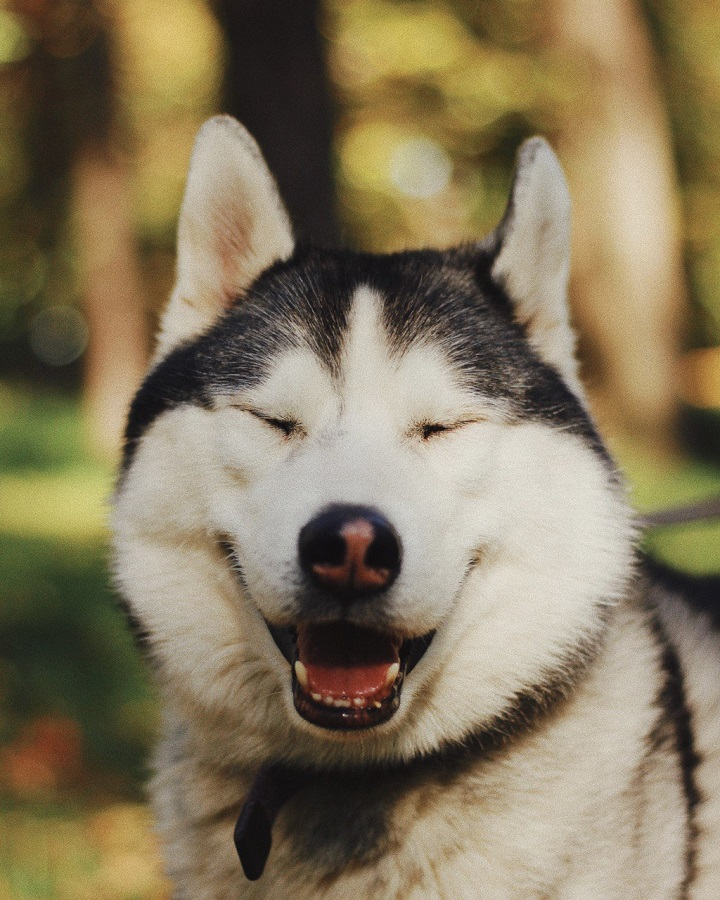

In [ ]:
path = 'happy-dog.jpg'
image = cv.imread(path)
image = image.astype('float32')
cv2_imshow(image)

Complete the below function for finding a reduced SVD of a given matrix. (You may use the functions for finding eigenvalues of the matrix). Highlight the key differences between SVD and the reduced version of it.

In [ ]:
def reduced_svd(A):
  '''
  Input: any matrix A
  Returns: tuple of matrix U, array of singular values and matrix V.T
  '''
  # your code here
  eigenvalues_AAT, eigenvectors_AAT = np.linalg.eig(np.dot(A, A.T))
  idx_AAT = eigenvalues_AAT.argsort()[::-1]
  eigenvalues_AAT = eigenvalues_AAT[idx_AAT]
  eigenvectors_AAT = eigenvectors_AAT[:, idx_AAT]

  singular_values = np.sqrt(eigenvalues_AAT)

  V = eigenvectors_AAT.T

  U = np.dot(np.dot(A.T, V).T, np.linalg.inv(np.diag(singular_values)))

  return U, singular_values, V.T


In [ ]:
U, singular_values, V_T = reduced_svd(A)
print("Matrix U:")
print(U)
print("\nSingular Values:")
print(singular_values)
print("\nMatrix V.T:")
print(V_T)

Matrix U:
[[-0.18528103 -0.93759534 -2.74290543 -2.17408021]
 [-0.20535416 -1.0441451  -1.84871689 -9.69927298]
 [ 0.05278079 -0.39988137  0.08161987 -1.28640509]
 [ 0.14320506  1.18465543  1.2610328   4.38897083]]

Singular Values:
[17.33847234  5.15839249  2.79573697  0.97581683]

Matrix V.T:
[[-0.30461046 -0.14903379  0.31295055 -0.88716591]
 [-0.54242371 -0.07127124 -0.83165076 -0.09515223]
 [-0.53433563 -0.64331012  0.35591771  0.41708524]
 [-0.57225381  0.74757035  0.28938132  0.17298151]]


The reduced $SVD$ basically chops off all the unimportant data: if a matrix $A$ is of rank $r$, it has only $r$ positive singular values. Other are zeros.
Thus, the reduced $SVD$ gets rid of those zero values $\sigma_i$ and corresponding left and right singular vectors that results in $m \times r$ matrix $U$,
$r \times r$ matrix $\Sigma$ and $r \times n$ matrix $V^T$.

Inspite of that, the reduced $SVD$ still returns us the matrix $A$!

Complete the function below. It should output the k-rank approximation of the given image using previously written SVD function. Use the slider to see how the image quality changes as we increase/decrease k.

For simplification, you can convert your image to a grayscale. However, it will be appreciated if you work with RGB channels (it is possible that you'll need to modify the method below a little).

In [ ]:
@interact(k=widget.IntSlider(min=1, max=np.linalg.matrix_rank(image[:, :, 0]), value=100), image=fixed(image))
def k_rank_compressed_image(k, image):
    approximated = image.copy()
    compressed_image = np.zeros_like(approximated)
    for i in range(3):
        U, S, Vt = np.linalg.svd(approximated[:, :, i])
        compressed_channel = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))
        compressed_channel = np.clip(compressed_channel, 0, 255).astype(np.uint8)
        compressed_image[:, :, i] = compressed_channel
    cv2_imshow(compressed_image)


interactive(children=(IntSlider(value=100, description='k', max=720, min=1), Output()), _dom_classes=('widget-…

In general, compressing the image to 60-80% percent of its original size  lowers its quality but human eye won't be even able to notice it. Therefore, we can win in storage while keeping almost the same image quality. Find out the range of $k$'s which result in keeping only 60-80% of the size of the original image. For what $k$'s there is no reason to use SVD for the sake of reducing storage space?

In [ ]:
def compressed_size(k, image):
  m = image.shape[0]
  n = image.shape[1]
  size_comp = m*k + k*k + k*n
  return size_comp
print("Compressed size for k = 60:", compressed_size(60, image))

Compressed size for k = 60: 100800


In [ ]:
lower_bound_k = upper_bound_k = compression_limit = 0
possible_k = []

lower_photo_size = image.shape[0] * image.shape[1] * 0.6
upper_photo_size = image.shape[0] * image.shape[1] * 0.8
compression_limit_size = image.shape[0] * image.shape[1]

for k in range(min(image.shape[0], image.shape[1])):
    current_size = compressed_size(k, image)
    if lower_photo_size <= current_size <= upper_photo_size:
        possible_k.append(k)
    elif current_size >= compression_limit_size:
        compression_limit = k
        break

if possible_k:
    lower_bound_k = min(possible_k)
    upper_bound_k = max(possible_k)

print("Range of k for 60-80% compression:", lower_bound_k, "-", upper_bound_k)
print("It makes no sense for compression with SVD for k more than:", compression_limit)


Range of k for 60-80% compression: 213 - 273
It makes no sense for compression with SVD for k more than: 332


### Results (1 pt)
Choose some metric for determining how good the compression with SVD is. Experiment with other compression algorithms (DCT, for instance). Compare it with SVD. Be creative;)

The PSNR value for DCT method: 5.44


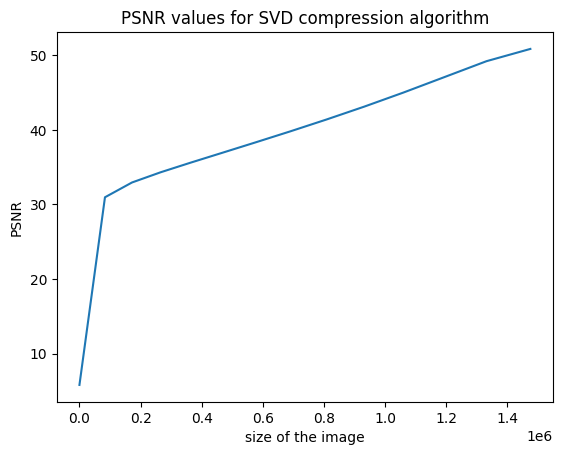

In [ ]:
def k_rank_compressed_image(k, image):
    approximated = image.copy()
    compressed_image = np.zeros_like(approximated)
    for i in range(3):
        U, S, Vt = np.linalg.svd(approximated[:, :, i])
        compressed_channel = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))
        compressed_channel = np.clip(compressed_channel, 0, 255).astype(np.uint8)
        compressed_image[:, :, i] = compressed_channel
    return np.clip(compressed_image, 0, 255).astype(np.uint8)

def dct_compress(image):
    image = np.float32(image) / 255.0
    dct_image = np.stack([cv.dct(image[:, :, i]) for i in range(3)], axis=-1)
    return np.uint8(dct_image * 255)

def psnr(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    return 20 * log10(max_pixel / sqrt(mse))

def main():
    svd_size = []
    svd_psnr = []
    ks = [i for i in range(0, 700, 50)]

    original = image.copy()

    for k in ks:
        compressed = k_rank_compressed_image(k, image)
        svd_size.append(compressed_size(k, image))
        svd_psnr.append(psnr(original, compressed))

    dct_compressed = dct_compress(image)
    dct_psnr = psnr(original, dct_compressed)
    print(f'The PSNR value for DCT method: {dct_psnr:.2f}')

    plt.plot(svd_size, svd_psnr)
    plt.xlabel('size of the image')
    plt.ylabel('PSNR')
    plt.title('PSNR values for SVD compression algorithm')
    plt.show()

if __name__ == "__main__":
    main()

Our Results task involves comparing the effectiveness of two image compression techniques, DCT and SVD, for digital images. The comparison is based on factors such as the degree of compression required, the computational resources available, and the desired level of image quality.

The task also includes a table of PSNR (Peak Signal-to-Noise Ratio) values for the SVD compression algorithm at different sizes of the image.
The table of PSNR values for the SVD compression algorithm indicates that the quality of the compressed image improves as the size of the image increases (showed the dependence of PSNR on the size of the compressed image for different values ​​of the parameter k when using the SVD method for image compression)


Overall, both DCT and SVD are effective compression techniques for digital images. The choice between the two depends on factors such as the degree of compression required, the computational resources available, and the desired level of image quality.